In [27]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

In [48]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_11/set11_5000.zarr/')

In [49]:
sim = sim.compute()

In [50]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 812)
Dimensions without coordinates: traj, obs
Data variables: (12/16)
    Kz                (traj, obs) float32 1.482e-05 1.461e-05 ... 0.001531
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... 35.65 35.63 35.6
    cons_temperature  (traj, obs) float32 0.7251 0.7317 0.74 ... 16.9 16.8 16.58
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... 1.026e+03
    diameter          (traj, obs) float64 5.005e-05 5.005e-05 ... 5.008e-05
    lat               (traj, obs) float64 -32.17 -32.14 -32.11 ... -32.39 -32.39
    ...                ...
    surface           (traj, obs) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2017...
    trajectory        (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    v_s               (traj, obs) float32 0.0 0.0004673 0.0004673 ... 0.0 0.0
    w                 (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    z                 (traj, obs) float64 5e+03 4.971e+03 ... 10.38 10.38
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-302-g14b3d034

[]

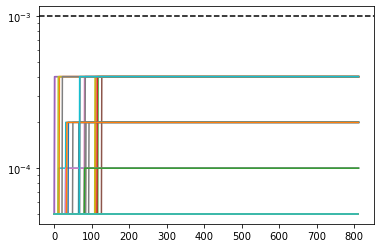

In [52]:
for i in range(0, 1000, 1):
    plt.plot(sim['diameter'][i,:])

plt.axhline(1e-3, color='black', linestyle='--')
plt.semilogy()
# plt.xlim(-10,10)

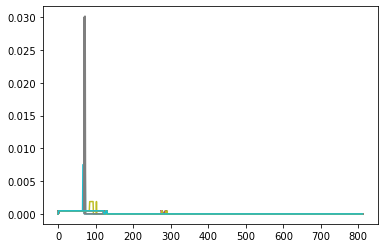

In [53]:
for i in range(0, 100, 1):
    plt.plot(sim['v_s'][i,:])

# plt.axhline(1e-3, color='black', linestyle='--')
# plt.semilogy()
# plt.xlim(-10,10)

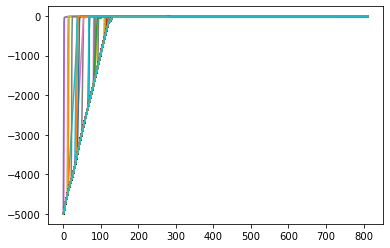

In [54]:
for i in range(0, 1000, 1):
    plt.plot(-sim['z'][i,:])

# plt.axhline(1e-3, color='black', linestyle='--')

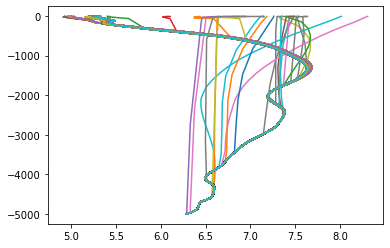

In [55]:
for i in range(0, 1000, 1):
    plt.plot(sim['lon'][i,:], -sim['z'][i,:])

    
# plt.axhline(1e-3, color='black', linestyle='--')

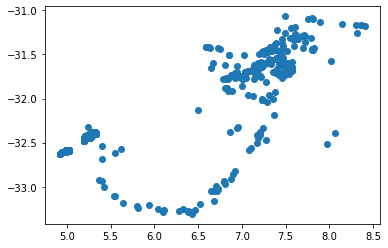

In [58]:
plt.scatter(sim['lon'][:,-1], sim['lat'][:,-1])

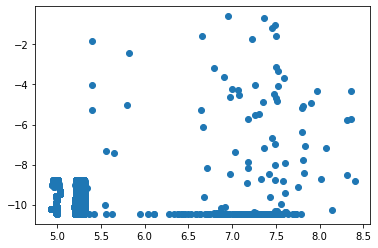

In [59]:
plt.scatter(sim['lon'][:,-1], -sim['z'][:,-1])

In [60]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

Text(0.5, 1.0, '10 years before sampling')

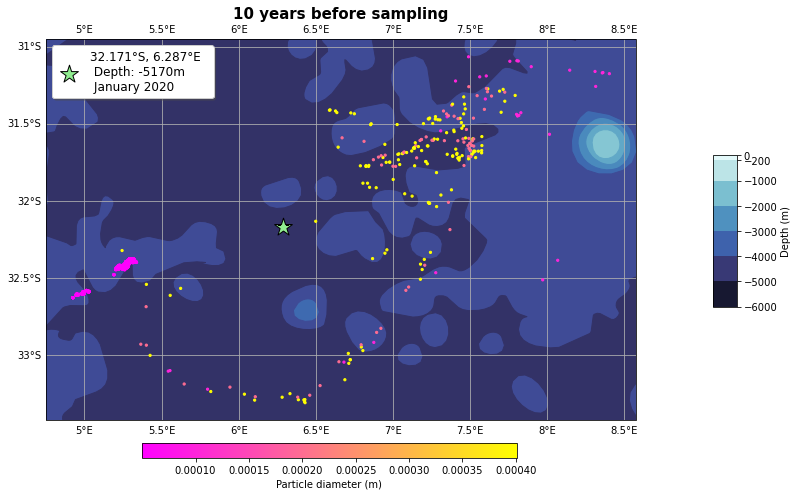

In [62]:
max_depth = -5500
min_depth = 0 

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim['lon'][:,-1], sim['lat'][:,-1], zorder=4, 
           c=sim['diameter'][:,-1], s=5, cmap='spring')
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle diameter (m)')
ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/revers.png')

## Timescale to reach the surface

In [67]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 812)
Dimensions without coordinates: traj, obs
Data variables: (12/16)
    Kz                (traj, obs) float32 1.482e-05 1.461e-05 ... 0.001531
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... 35.65 35.63 35.6
    cons_temperature  (traj, obs) float32 0.7251 0.7317 0.74 ... 16.9 16.8 16.58
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... 1.026e+03
    diameter          (traj, obs) float64 5.005e-05 5.005e-05 ... 5.008e-05
    lat               (traj, obs) float64 -32.17 -32.14 -32.11 ... -32.39 -32.39
    ...                ...
    surface           (traj, obs) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2017...
    trajectory        (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    v_s               (traj, obs) float32 0.0 0.0004673 0.0004673 ... 0.0 0.0
    w                 (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    z                 (traj, obs) float64 5e+03 4.971e+03 ... 10.38 10.38
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-302-g14b3d034

In [74]:
sim['surface'].where()

NameError: name 'surface' is not defined

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

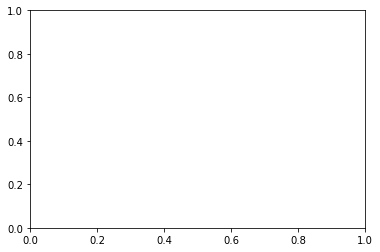

In [71]:
plt.plot(sim.where(sim['surface']== 1))

In [ ]:
s